In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import kagglehub as kh
from google.colab import drive
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import random

In [ ]:
data_dir = '/content/drive/MyDrive/PetImages'

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.08, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
image_datasets = {
    'train': datasets.ImageFolder(data_dir, transform=data_transforms['train']), # Apply training transform here
    'valid': datasets.ImageFolder(data_dir, transform=data_transforms['valid']), # Apply validation transform here
}

dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=32, shuffle=True),
    'valid': torch.utils.data.DataLoader(image_datasets['valid'], batch_size=32),
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

In [ ]:

model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

# Congelar as camadas iniciais
for param in model.parameters():
    param.requires_grad = False

# Substituir a camada final
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


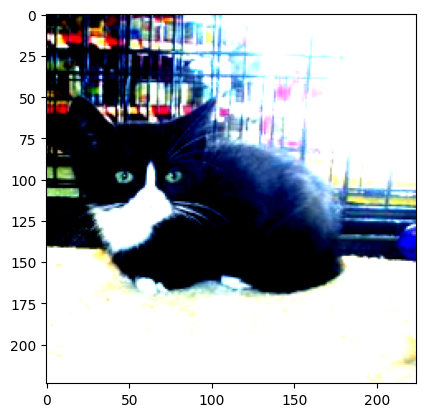

In [ ]:
train_iter = iter(dataloaders['train'])


images, labels = next(train_iter)

transformed_image = images[0]



plt.imshow(transformed_image.permute(1, 2, 0))
plt.show()

In [ ]:
print(images[0].shape)
print(labels[0].shape)

torch.Size([3, 224, 224])
torch.Size([])


In [ ]:
class Modelo(nn.Module):

    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(224*224, 128) # camada de entrada, aq a imagem com 784 neuronios, se conectarão com 128
        self.linear2 = nn.Linear(128, 64) # aq os 128 da camada de entrada se conectarão com os 64 da primeira camada interna
        self.linear3 = nn.Linear(64, 10) # aq os 64 da primeira interna vai conectar com os 10 neuronios da segunda interna

def forward(self, X):
    X = F.relu(self.Linear1(X)) # ativando camada de entrada e ligando com a primeira interna
    X = F.relu(self.Linear2(X)) #interna 1 para interna 2
    X = self.Linear3(X)
    return F.log_softmax(X, dim=1)

In [ ]:
def treino(modelo, trainloader, device):
    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
    inicio = time()  # timer para ver o quanto demorou o treino

    criterio = nn.NLLLoss()
    EPOCHS = 10  # isso indica quantas vezes os dados passaram pela rede até ser treinada.
    modelo.train()  # ativando modo treino

    for epoch in range(EPOCHS):
        perda_acumulada = 0

        for images, labels in trainloader:
            images = images
            images = images.view(images.shape[0], -1)
            otimizador.zero_grad()

            output = modelo(images.to(device))  # calcula a perda da época da vez
            perda_instantanea = criterio(output, labels.to(device))

            perda_instantanea.backward()  # Propaga o erro de volta através da rede e calcula os gradientes dos parâmetros em relação à perda.

            otimizador.step()  # atualizando os pesos e a bias - bias é o valor adicionado ao produto da entrada e do peso antes de passar pela função de ativação.

            perda_acumulada += perda_instantanea.item()  # atualiza a perda acumulada

        print(f"Epoch {epoch+1} - Perda resultante: {perda_acumulada / len(trainloader)}")

    print("\nTempo de treino (em minutos) =", (time() - inicio) / 60)

In [ ]:
def validacao(modelo, valloader, device):
    conta_corretas, conta_todas = 0, 0
    for imagens, labels in valloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)

            with torch.no_grad():
                logps = modelo(img.to(device))

            ps = torch.exp(logps)
            probab = list(ps.cpu().numpy()[0])
            etiqueta_pred = probab.index(max(probab))
            etiqueta_certa = labels.numpy()[i]
            if(etiqueta_certa == etiqueta_pred):
                conta_corretas += 1
            conta_todas += 1

    print("Total de imagens testadas =", conta_todas)
    print("\nPrecisão do modelo = {}%".format(conta_corretas * 100 / conta_todas))

In [ ]:
modelo = Modelo()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # vai rodar na gpu se possivel
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=50176, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
def visualize_images(images, labels, num_images=5):
    # conversor de tensor para nparray
    images = images.numpy().transpose((0, 2, 3, 1))
    labels = labels.numpy()

   # seleção de fotos
    indices = np.random.choice(range(len(images)), num_images, replace=False)
    selected_images = images[indices]
    selected_labels = labels[indices]

    # Plots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i, ax in enumerate(axes):
        ax.imshow(selected_images[i])
        ax.axis('off')
        ax.set_title(f'Label: {selected_labels[i]}')
    plt.show()


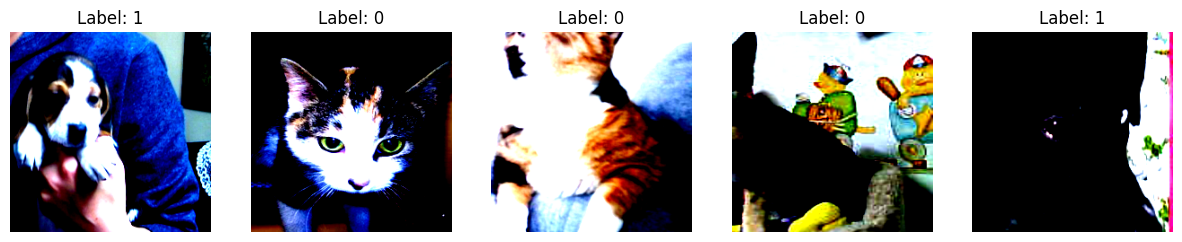

In [ ]:
visualize_images(images, labels, num_images=5)

In [ ]:
print(torch.unique(labels))

tensor([0, 1])
